Spam Message Classification

1) Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#load dataset and show first rows
df = pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
#how many empty cells we have in each column
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
#descriptive statistics of numerical data
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
#check portion of ham and spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
#express portions in precentage mode
(df['label'].value_counts()/len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [9]:
 #we have an unbalanced dataset SO we need to choose a good portion for train dataset but also for test dataset
 #lets split the dataset in 2: ham messages and spam messages
 ham =  df[df['label']=='ham']
 spam =  df[df['label']=='spam']

In [10]:
#our new datasets dimensions
ham.shape, spam.shape

((4825, 4), (747, 4))

In [20]:
#lets have the same sample size of spam because it is smaller dataset
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [21]:
#stick both datasets together
data = ham.append(spam,ignore_index=True)
data['label'].value_counts()


spam    747
ham     747
Name: label, dtype: int64

In [22]:
data.shape

(1494, 4)

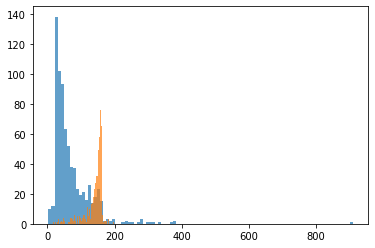

In [25]:
#creating an histogram to find insights about the data
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

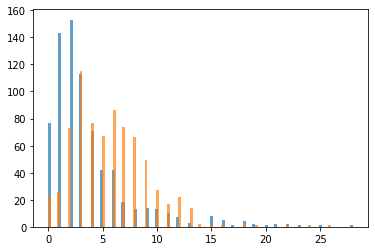

In [26]:
#creating an histogram to find insights about the data
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [27]:
data

,label,message,length,punct
0,ham,Those cocksuckers. If it makes you feel better...,133,1
1,ham,Ok thanx...,11,3
2,ham,You always make things bigger than they are,43,0
3,ham,I will see in half an hour,26,0
4,ham,"Chinatown got porridge, claypot rice, yam cake...",131,9
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [28]:
from sklearn.model_selection import train_test_split

In [30]:
#creating train and test datasets
X_train,X_test,Y_train,Y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state = 0,shuffle=True)

In [31]:
X_train.shape

(1045,)

In [33]:
Y_train.shape

(1045,)

2) Building the Model (Random Forest)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 

from sklearn.pipeline import Pipeline

In [43]:
#generate pipeline to tain the model, and define hyperparameters in the classifier
classifier = Pipeline([('tfidf',TfidfVectorizer()), ('classifier',RandomForestClassifier(n_estimators=100))])

In [44]:
#start training
classifier.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

3) Predicting results (Random Forest)


In [46]:
#make some predictions with the trained model
y_pred = classifier.predict(X_test)

In [47]:
#lets see how effective was the prediction
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [48]:
#lets see how accurate was our model
accuracy_score(Y_test,y_pred)

0.9376391982182628

In [49]:
#see how good our model is using confussion matrix
confusion_matrix(Y_test,y_pred)

array([[224,   3],
       [ 25, 197]])

In [50]:
#see how good our model is using classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       227
        spam       0.98      0.89      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



4) Building the Model (SVM)

In [52]:
from sklearn.svm import SVC

In [56]:
#generate pipeline to tain the model, and define hyperparameters in the classifier
svm = Pipeline([('tfidf',TfidfVectorizer()), ('classifier',SVC(C = 100,gamma='auto'))])

In [57]:
#train our suppor vector machine model
svm.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

5) Predicting results (SVM)

In [59]:
#make some predictions with the trained model
y_pred = svm.predict(X_test)

In [60]:
accuracy_score(Y_test,y_pred) 

0.9465478841870824

In [61]:
#see how good our model is using confussion matrix
confusion_matrix(Y_test,y_pred)

array([[223,   4],
       [ 20, 202]])

In [62]:
#see how good our model is using classification report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



6) Experimenting with owr texts

In [65]:
test1 = ['Hi, Hope you are enjoying learning Artificial Intelligence']
test2 = ['Hello!! you have a new job proposal as machine learning engineer']
test3 = ['COngratulations, you have won a newly ferrari, to claim your prize call us now']

In [67]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
